In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def calculate_ncc(image1, image2):
    arr1 = np.array(image1)
    arr2 = np.array(image2)
    mean1 = np.mean(arr1)
    mean2 = np.mean(arr2)
    cross_corr = np.sum((arr1 - mean1) * (arr2 - mean2))
    std1 = np.std(arr1)
    std2 = np.std(arr2)
    ncc = cross_corr / (std1 * std2)
    return ncc

In [3]:
def convolution(image, kernel):
    image_height, image_width = len(image), len(image[0])
    kernel_height, kernel_width = len(kernel), len(kernel[0])
    
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    result = np.zeros_like(image)

    for i in range(image_height):
        for j in range(image_width):
            pixel_sum = 0
            for m in range(kernel_height):
                for n in range(kernel_width):
                    pixel_sum += padded_image[i + m][j + n] * kernel[m][ n]
            result[i][j] = pixel_sum

    return result

In [4]:
def plothist(im):
    imf=im.flatten()
    imf=list(imf)
    gs=[x for x in range(256)]
    fre=[]
    for i in gs:
        fre.append(imf.count(i))
    plt.plot(gs,fre)
    plt.show()

In [5]:
def HistEq(im):
    imf=im.flatten()
    imf=list(imf)
    gs=[x for x in range(256)]
    fre=[]
    for i in gs:
        fre.append(imf.count(i))
    nhist=[]
    for x in fre:
        nhist.append(x/im.size)
    cprob=np.cumsum(np.array(nhist))
    sk=[]
    for x in cprob:
        sk.append(round(255*x))
    newimg=np.zeros((512,512))
    for row in range(512):
        for col in range(512):
            newimg[row][col]=sk[im[row][col]]
    return newimg   
    

# Image Hiding

In [6]:
cover=cv2.imread("lena.tiff",0)

In [7]:
secret=cv2.imread("tank.tiff",0)

In [8]:
secret = cv2.resize(secret,(64,64))

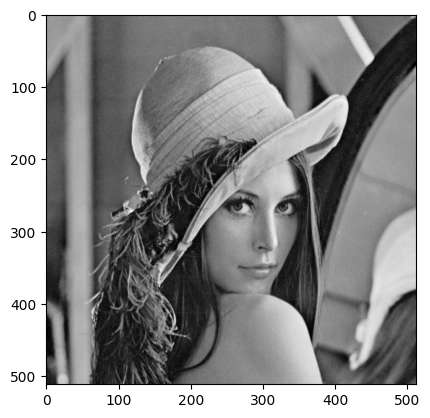

In [9]:
plt.imshow(cover,cmap='gray')
plt.show()

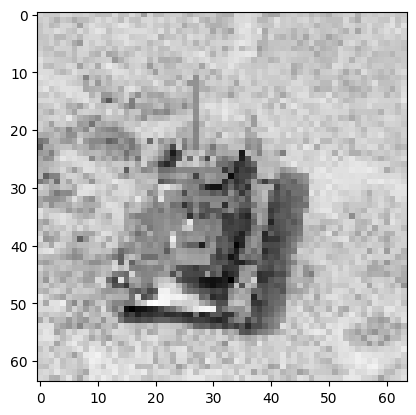

In [10]:
plt.imshow(secret,cmap='gray')
plt.show()

In [11]:
def int_to_bin(decimal):
    return ('{0:08b}'.format(decimal))

In [12]:
def bin_to_int(binary):
    return (int(binary, 2))

In [13]:
def image_to_bits(image):
    flat_data=image.flatten()
    msg=''
    for x in flat_data:
        msg=msg+int_to_bin(x)
    return msg

def bits_to_image(msg,r,c):
    l=len(msg)
    msg_im=[]
    pos=0
    while pos<l:
        msg_im.append(bin_to_int(msg[pos:pos+8]))
        pos=pos+8
    msg_im=np.reshape(msg_im,(r,c))
    return msg_im

In [14]:
def Embedding2lsb(cover,secret):
    r=cover.shape[0]
    c=cover.shape[1]
    stego=cover.flatten()
    smsg=image_to_bits(secret)
    pos=0
    l=len(smsg)
    i=0
    while pos<l:
        pix=stego[i]
        bpix=int_to_bin(pix)
        m=list(bpix)
        y=smsg[pos:pos+2]
        m[6:]=y
        n="".join(m)
        stego[i]=bin_to_int(n)
        i=i+1
        pos=pos+2
    stego=np.reshape(stego,(r,c))
    return stego   
      

In [15]:
def Extraction2lsb(stego,r,c):
    stego=stego.flatten()
    nop=r*c*4
    msg=''
    i=0
    while i<nop:
        pix=stego[i]
        bpix=int_to_bin(pix)
        bits=bpix[6:]
        msg=msg+bits
        i=i+1
    rimg=bits_to_image(msg,r,c)
    return rimg  
    
    
    

In [16]:
def mse_psnr(a,b):    
    a=a.astype('float64')
    b=b.astype('float64')
    rows,cols=a.shape
    a=a.ravel()
    b=b.ravel()
    mse=0.0
    for i in range(rows*cols):
        mse=mse+math.pow(a[i]-b[i],2)
    mse=mse/(rows*cols)   
    try:
        psnr=20 * math.log10(255.0/ math.sqrt(mse))
        return mse,psnr
    except:
        return mse,-999

In [17]:
def show_result_images(a,b,c,d):
    fig, axes = plt.subplots(nrows=1, ncols=4)
    fig.tight_layout()
    fig.set_figwidth(10)
    fig.set_figheight(2)
    plt.subplot(1,4,1)
    plt.imshow(a,'gray')
    plt.title("Original"+str(a.shape[0])+'x'+str(a.shape[1]))
    plt.subplot(1,4,2)
    plt.imshow(c,'gray')
    plt.title('DATA IMAGE'+str(c.shape[0])+'x'+str(c.shape[1]))
    plt.subplot(1,4,3)
    plt.imshow(b,'gray')
    plt.title("Stego"+str(b.shape[0])+'x'+str(b.shape[1]))
    plt.subplot(1,4,4)
    plt.imshow(d,'gray')
    plt.title('Recovered DATA'+str(d.shape[0])+'x'+str(d.shape[1]))
    #plt.savefig('plot'+imname+'___.png')
    plt.show()

In [18]:
stego=Embedding2lsb(cover,secret)

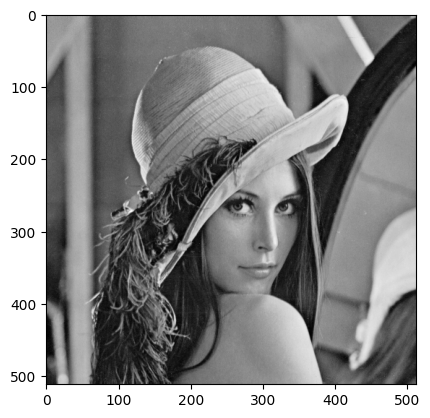

In [19]:
plt.imshow(stego,cmap='gray')
plt.show()

In [20]:
rsecret=Extraction2lsb(stego,64,64)

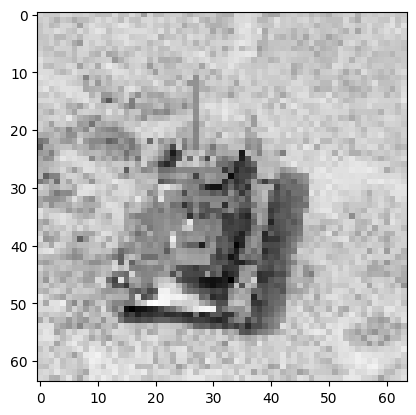

In [21]:
plt.imshow(rsecret,cmap='gray')
plt.show()

In [22]:
mse,psnr=mse_psnr(cover,stego)

In [23]:
print(mse,psnr)

0.14085006713867188 56.64323302531934


In [24]:
mse,psnr=mse_psnr(secret,rsecret)
print(mse,psnr)

0.0 -999


In [25]:
copy = np.copy(stego)

# Apply Gaussian Filtering 

In [26]:
gaussian_stego = cv2.GaussianBlur(copy, (3,3), 0.5)

In [27]:
rsecret=Extraction2lsb(gaussian_stego,64,64)

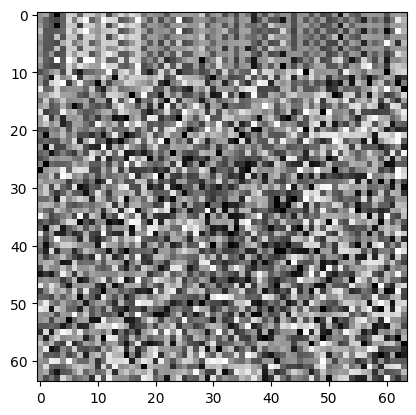

In [28]:
plt.imshow(rsecret,cmap='gray')
plt.show()

In [29]:
mse,psnr=mse_psnr(cover,gaussian_stego)

In [30]:
print(mse,psnr)

3.878467559814453 42.24420197588027


In [31]:
mse,psnr=mse_psnr(secret,rsecret)
print(mse,psnr)

3993.68994140625 12.117060163981686


In [32]:
calculate_ncc(secret,rsecret)

651.4250552422408

# Apply Midean Filtering

In [33]:
median_stego = cv2.medianBlur(copy, 3)

In [34]:
rsecret=Extraction2lsb(median_stego,64,64)

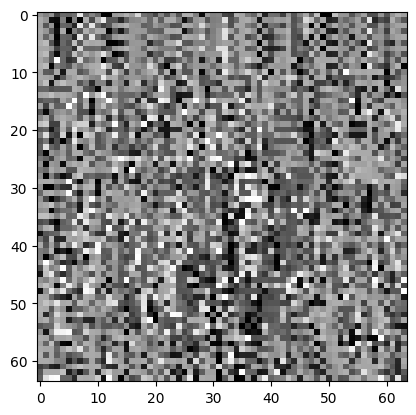

In [35]:
plt.imshow(rsecret,cmap='gray')
plt.show()

In [36]:
mse,psnr=mse_psnr(cover,median_stego)

In [37]:
print(mse,psnr)

18.026798248291016 35.57161762630058


In [38]:
mse,psnr=mse_psnr(secret,rsecret)
print(mse,psnr)

4038.031982421875 12.06910606504388


In [39]:
calculate_ncc(secret,rsecret)

342.77672537859655

# Apply JPEG Compression

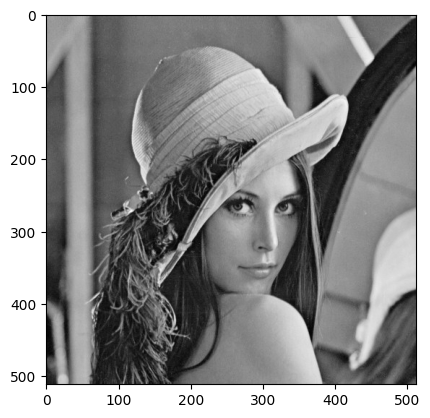

In [40]:
copressedval = [cv2.IMWRITE_JPEG_QUALITY, 90]
cv2.imwrite('jpegCompress.jpeg', copy, copressedval)
compessed_stego = cv2.imread('jpegCompress.jpeg',0)
plt.imshow(compessed_stego, cmap='gray')
plt.show()

In [41]:
rsecret=Extraction2lsb(compessed_stego,64,64)

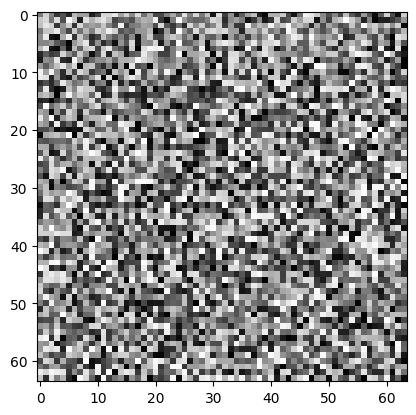

In [42]:
plt.imshow(rsecret,cmap='gray')
plt.show()

In [43]:
mse,psnr=mse_psnr(cover,median_stego)

In [44]:
print(mse,psnr)

18.026798248291016 35.57161762630058


In [45]:
mse,psnr=mse_psnr(secret,rsecret)
print(mse,psnr)

5930.420654296875 10.399948612033782


In [46]:
calculate_ncc(secret,rsecret)

111.63745552415371